# Фейк рейтинги


## Обзор проекта

Пусть вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? Особенно если та компания, которая занимается рейтингами и отзывами, также зарабатывает на продаже билетов на фильмы. Исследование направлено на проверку наличия тенденции выдавать завышенные или заниженные рейтинги у компаний

### Цель проекта:

Провести исследования по мативам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье, основываясь на данных компании Fandango в 2015 году.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Часть 1: Исследование данных


### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s] находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv
Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

 Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
all_sites = pd.read_csv("all_sites_scores.csv")

## Часть 2: Сравнение рейтингов Fandango и других пользовательских рейтингов

**Изучим рейтинги Fandango.**


In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Рассмотрим связь между популярностью фильма и его рейтингом.**

<Axes: xlabel='RATING', ylabel='VOTES'>

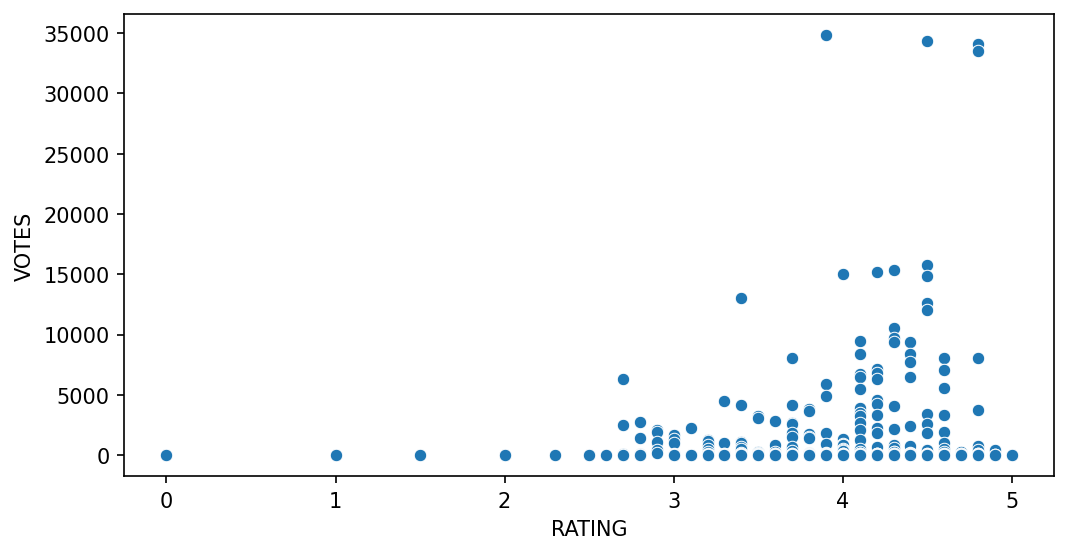

In [7]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

In [8]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Cоздадим новую колонку, где будет прописан год, и попробуем найти закономерность.**

Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате: Название Фильма (Год).

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: int(x.split('(')[-1][:-1]))
fandango.sample(1)

,FILM,STARS,RATING,VOTES,YEAR
444,Coffee Bloom (2015),0.0,0.0,0,2015


In [10]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

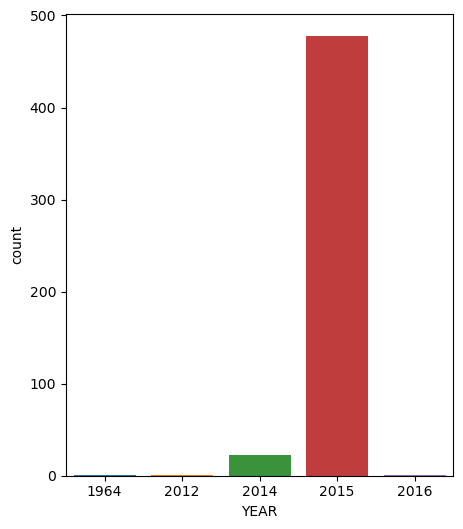

In [11]:
plt.figure(figsize=(5,6))
sns.countplot(data=fandango, x='YEAR')

**Топ 10 фильмов по количеству голосов**

In [12]:
fandango.nlargest(10, "VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [13]:
sum(fandango['VOTES'] == 0)

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes).**

In [14]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

**Визуализируем распределение pзвезд и рейтинга.**

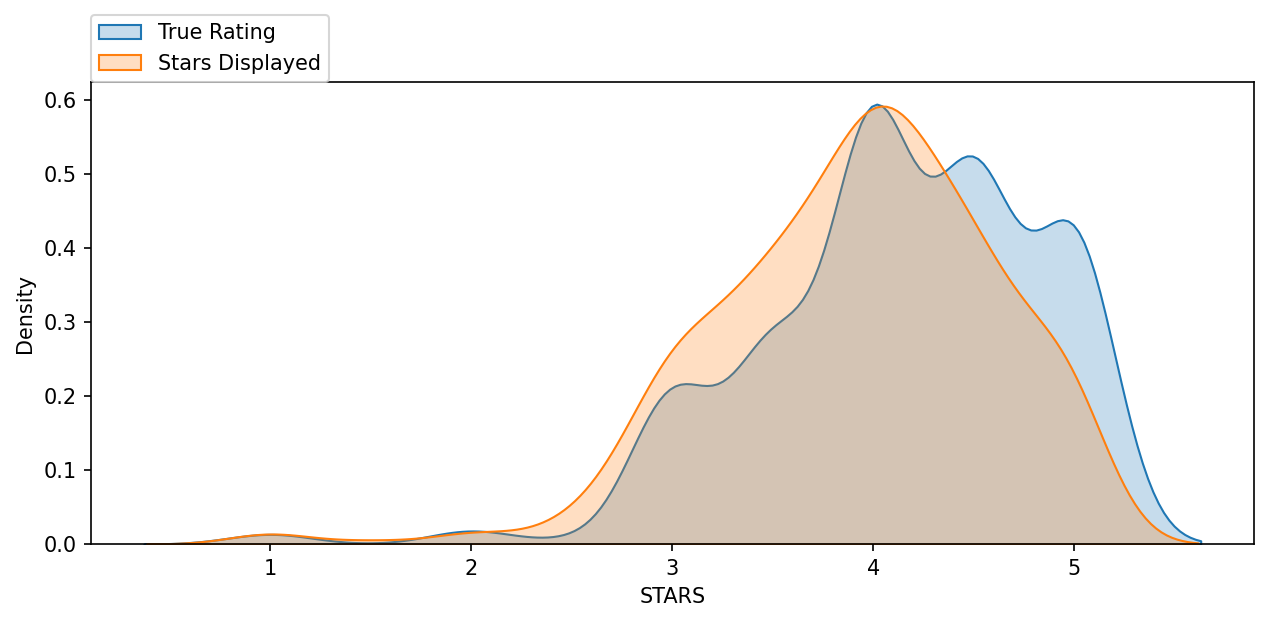

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed, x='STARS', fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='RATING', fill=True, label='Stars Displayed')
plt.legend(loc=[0,1])

Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. 

**Посчитаем эту разницу в численном виде.**

Создадим новую колонку, в которой сохраним разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, округлим до одной десятичной цифры после запятой.

In [53]:
fan_reviewed.loc[:, 'DIFF'] = (fandango['STARS'] - fandango['RATING']).round(2)

In [17]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Нарисуем график для отображения, чтобы узнать сколько раз встречается то или иное значение разницы между STAR и RATING**

<Axes: xlabel='DIFF', ylabel='count'>

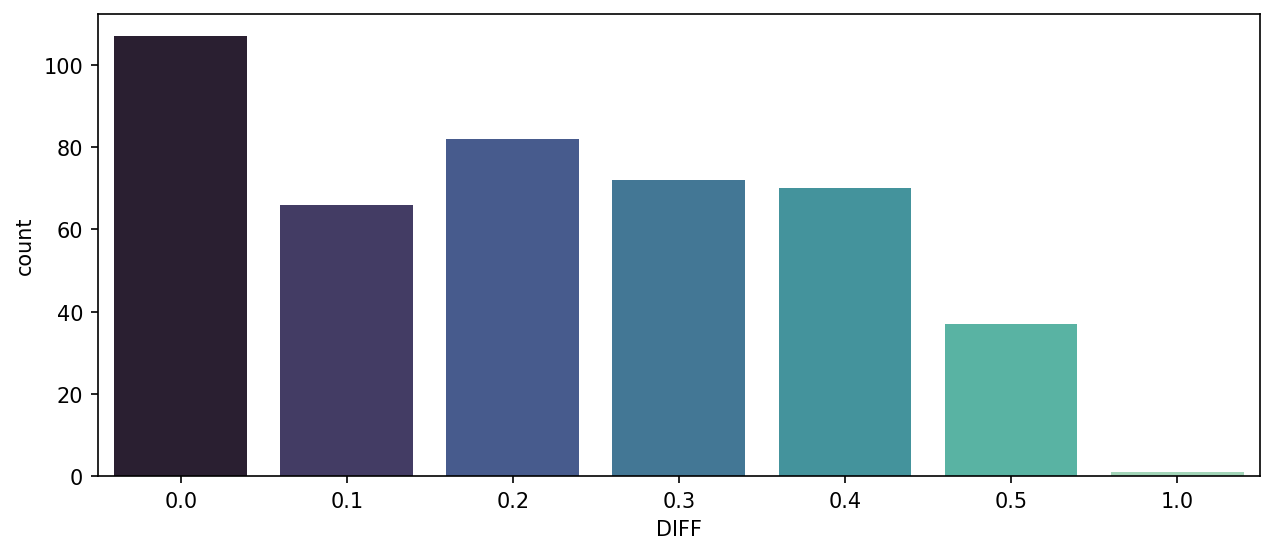

In [18]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=fan_reviewed, x='DIFF', palette='mako')

На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом!

In [19]:
fan_reviewed[fan_reviewed['DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.


In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

(0.0, 110.0)

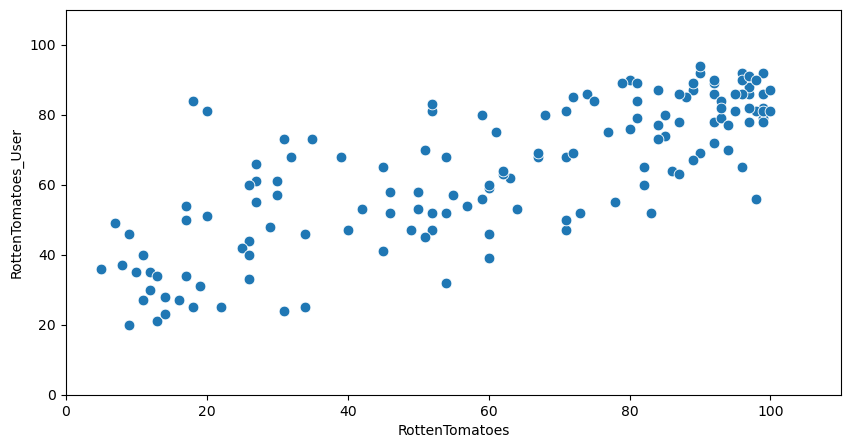

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User', s=60)
plt.xlim(0, 110)
plt.ylim(0, 110)

**Изучим численную разницу между этими двумя рейтингами.**

Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [24]:
all_sites.loc[:, 'Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Посчитаем среднее значение полученной разницы по всему набору данных.** 

Поскольку разница может быть как положительной, так и отрицательной, то сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом, мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [25]:
all_sites["Rotten_Diff"].abs().mean()

15.095890410958905

График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

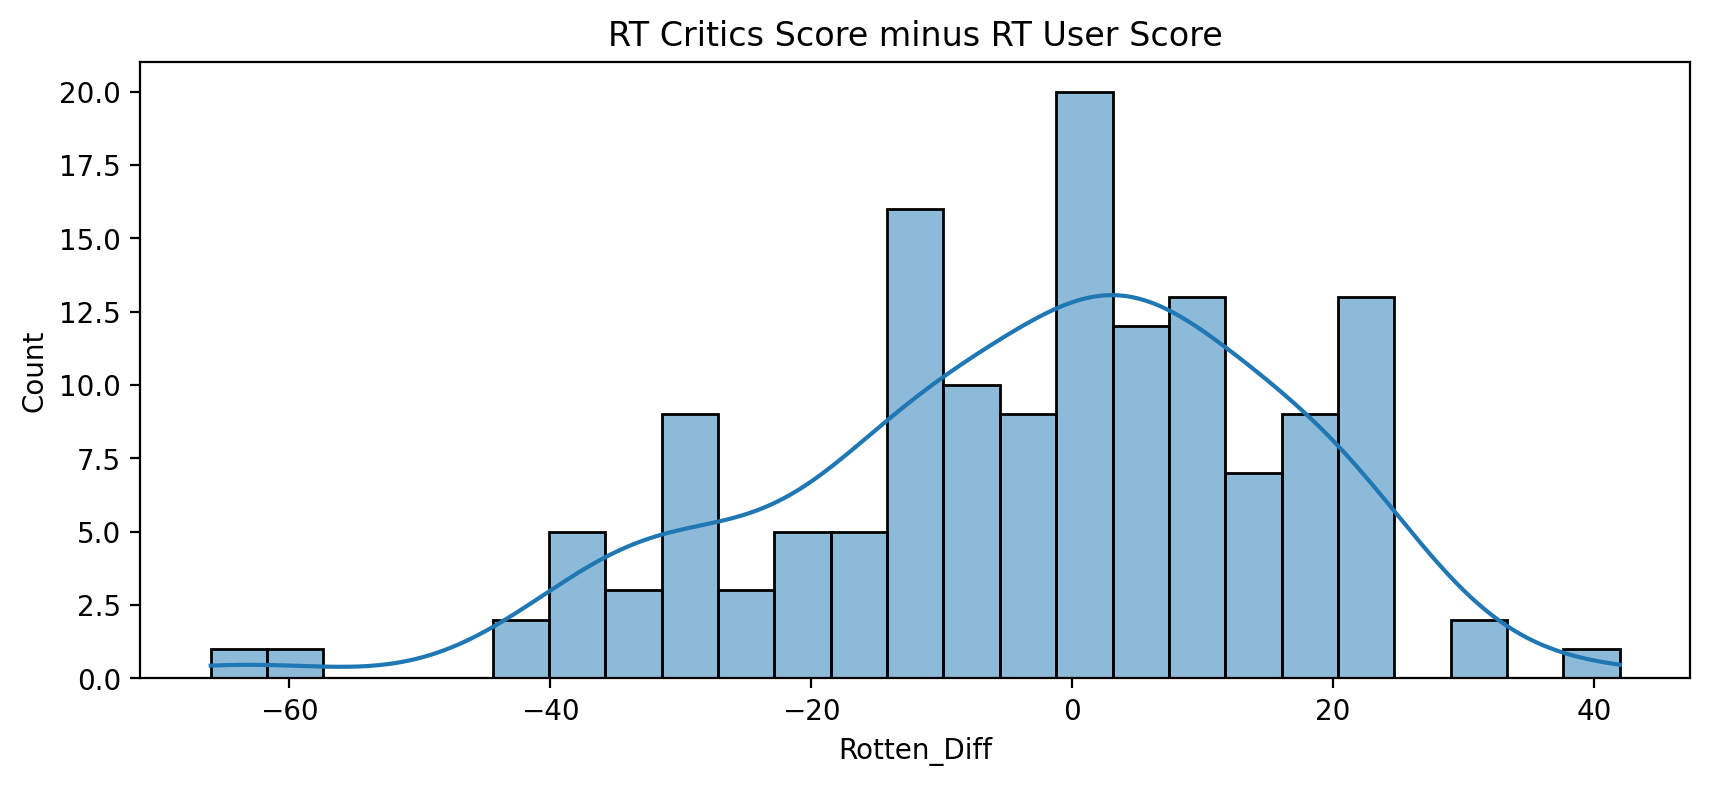

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True)
plt.title("RT Critics Score minus RT User Score")

График распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.

Text(0.5, 1.0, 'ABS(RT Critics Score - RT User Score)')

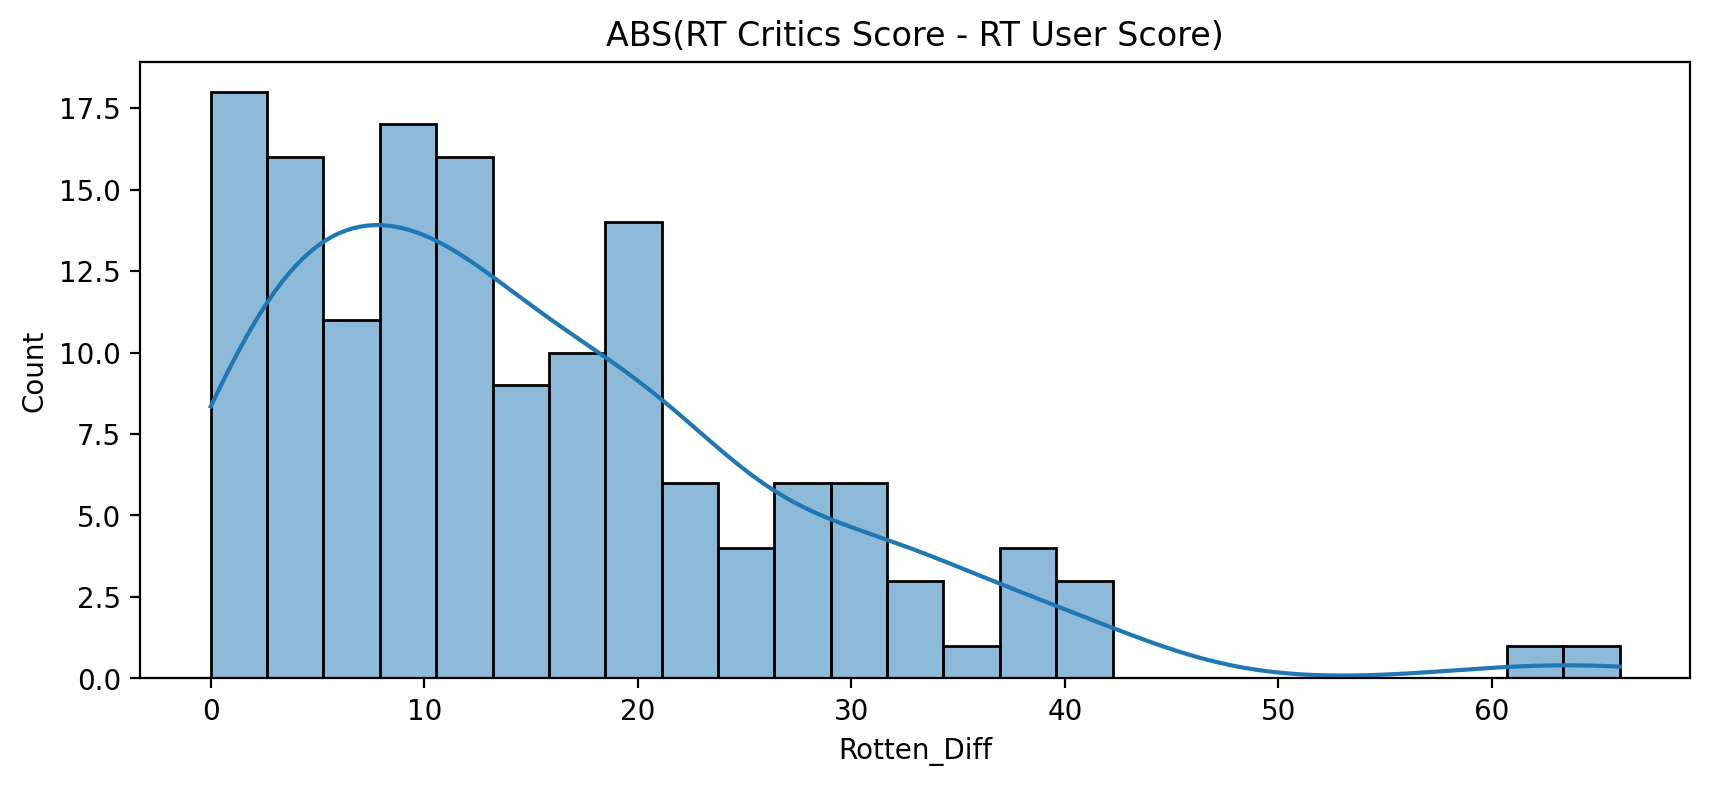

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)
plt.title("ABS(RT Critics Score - RT User Score)")

**Выясним, какие фильмы наиболее отличаются по рейтингам.**

Оценены выше зрителями, по сравнению с оценками от критиков:

In [28]:
all_sites.nsmallest(5, 'Rotten_Diff')[["FILM", "Rotten_Diff"]]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Оценены выше критиками, по сравнению с оценками от пользователей:

In [29]:
all_sites.nlargest(5, 'Rotten_Diff')[["FILM", "Rotten_Diff"]]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### Рейтинги от MetaCritic

Быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

(0.0, 11.0)

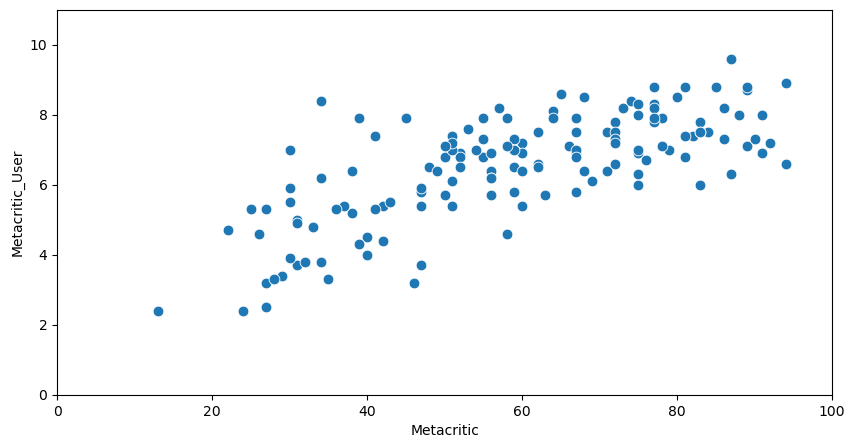

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User', s=60)
plt.xlim(0, 100)
plt.ylim(0, 11)

### Рейтинги от IMDB

Наконец, посмотрим на рейтинги от IMDB. Metacritic и IMDB также показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**ЗАДАНИЕ: Нарисуйте график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

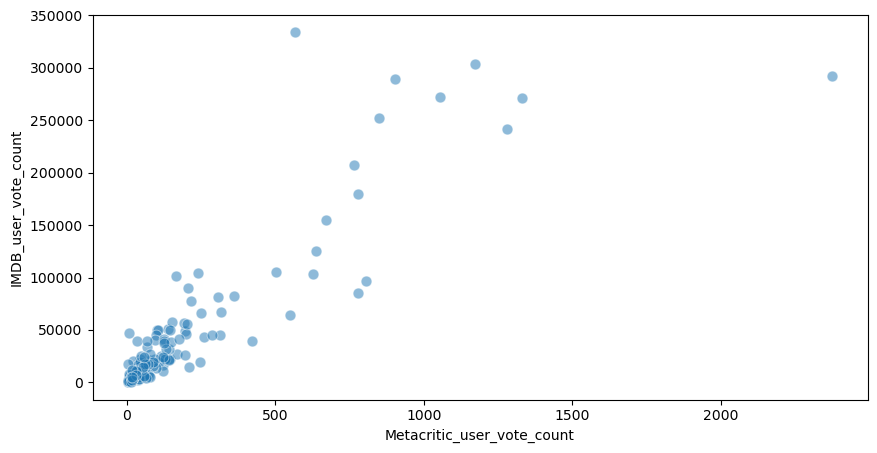

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count', s=60, alpha=0.5)

Мы наблюдаем два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. 

Фильм, получивший наибольшее количество голосов на IMDB:

In [32]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Фильм, получивший наибольшее количество голосов на Metacritic:

In [33]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

Сделаем "*inner* merge" двух наборов данных (fandango и all_sites), так как мы хотим сравнивать только те фильмы, которые есть в обеих таблицах.

In [34]:
df = pd.merge(fandango, all_sites, how="inner")
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нормализуем эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [35]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Создадим DataFrame norm_scores, в котором оставим только нормализованные рейтинги.

In [36]:
norm_scores = df[["FILM", "STARS", "RATING", "RT_Norm", "RTU_Norm", "Meta_Norm", "Meta_U_Norm", "IMDB_Norm"]]

In [37]:
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний

Cравним распределения нормализованных рейтингов от всех компаний. 

<Axes: ylabel='Density'>

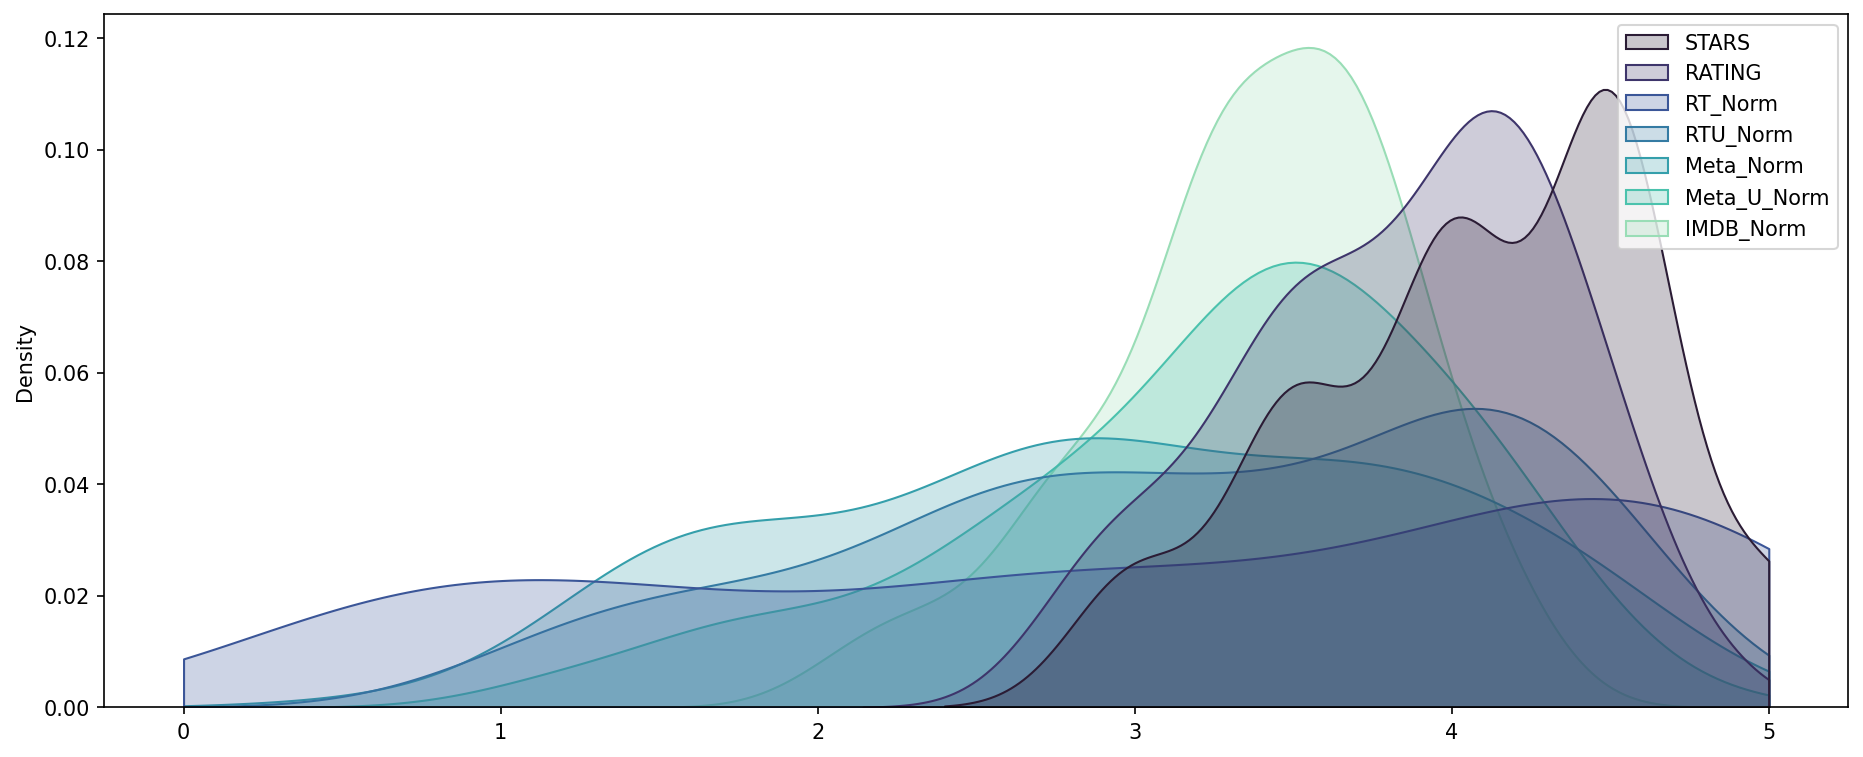

In [54]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores, fill=True, clip=[0,5], palette="mako")

Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

### Как различные компании оценивают фильмы с наименьшими рейтингами?

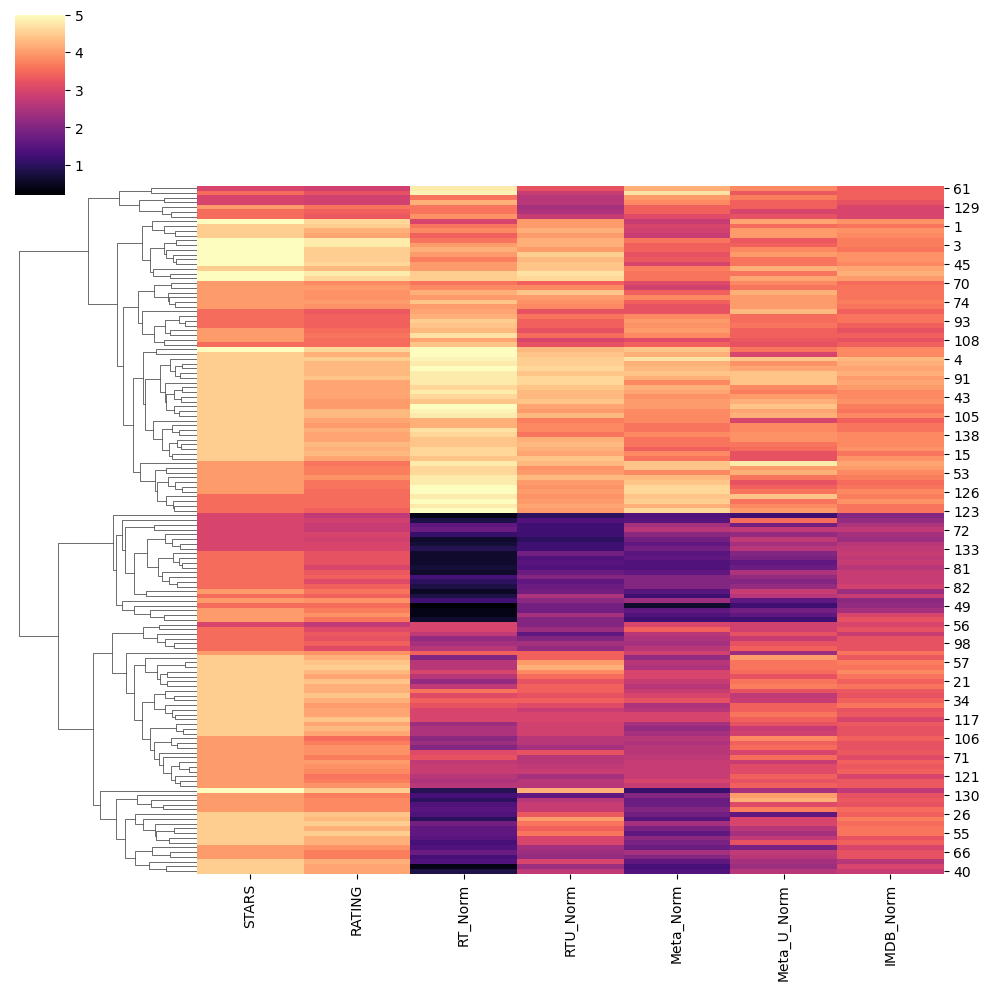

In [44]:
sns.clustermap(norm_scores[["STARS", "RATING", "RT_Norm", "RTU_Norm", "Meta_Norm", "Meta_U_Norm", "IMDB_Norm"]], cmap='magma', col_cluster=False)

Рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic.

In [48]:
norm_scores.nsmallest(n=10, columns=["RT_Norm"])

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.

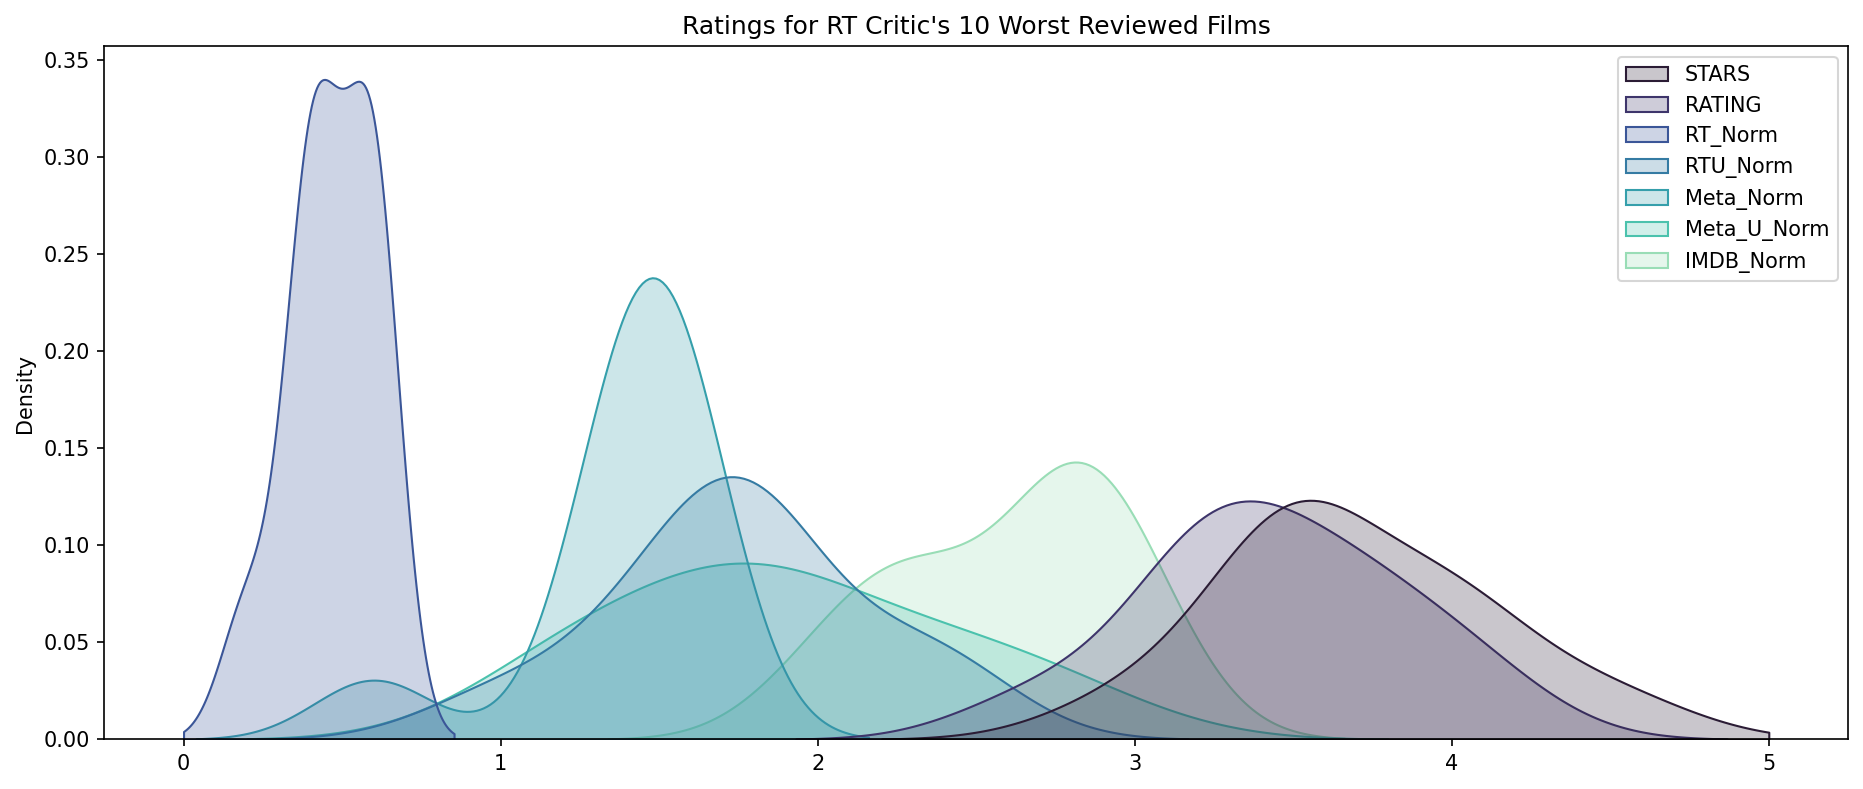

In [50]:
plt.figure(figsize=(15,6),dpi=150)

worst_films = norm_scores.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films, clip=[0,5], fill=True, palette='mako')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

Вывод: как мы и ожидали Fandango завышал рейтинги для фильмов, которые явно были неудачными.
    
Больше всего отличается фильм Taken 3! - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил средний рейтинг 1.86 от других компаний!

In [52]:
norm_scores.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object